# PCA 기본 코드 리뷰
* PCA using Python(w/ scikit-learn) 블로그를 리뷰 하면서 기본 PCA코드를 손에 익힌다.
* vim-jupyter를 이용하면서 자연스레 vim사용 법도 익혀 본다.
* markdown을 이용한 jupyter를 작성하며 jupyter에 능숙해진다.
* 주석을 최대한 많이 달며 정리 한다.

blog addr : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

* jupyter 사용 시 커널 선택.
   * 오른쪽 위가 `clustering` 커널이 잡혀있는지 확인
   * 만약 다른 커널이 선택되어 있을 시, `메뉴-kernel-change kernel-clustering`선택

**Tip. 자주 쓰게 되는 단축키 모음**
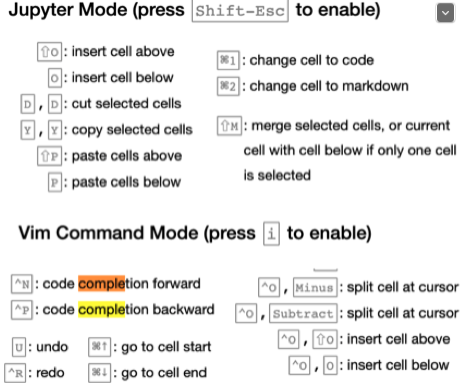

-------------
코드 리뷰 시작

## PCA using Python ( scikit-learn )

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
from sklearn.model_selection import train_test_split 
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)

In [3]:
train_img.shape

(60000, 784)

In [4]:
test_img.shape

(10000, 784)

In [5]:
train_img[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
test_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# step 2. 데이터 정규화.
scikit learn 함수를 이용한 데이터 정규화.

In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
#fit on training set only
scaler.fit(train_img)
#apply transform to both the training set and the test set
train_img_scale = scaler.transform(train_img)
test_img_scale = scaler.transform(test_img)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(train_img_scale)

PCA(n_components=0.95)

pca 모델을 구성할 때에 n_components를 갯수 선택과 비율로 선택함에는 차이가 없다. 그 이유는 각 dataset에서 pca 모델을 구성할 적에 각 components가 variance의 어느 정도 설명 할 수 있는지가 결정되어 있기 때문이다. 사이킷런 패키지 사용시 pca.explained_variance_ratio_을 사용하여 확인할 수 있습니다. 그렇기에 pca 모델을 구성하고 component 수를 잘 선택했는지 확인한 후 시각화를 하는 것이 맞는 순서라고 판단됩니다. 

In [63]:
#reduce the dimensionality of data
# lower_dimensional_data = pca.fit_transform(mnist.data)
# pca.n_components_
# approximation = pca.inverse_transform(lower_dimensional_data)

In [64]:
# approximation.shape

In [10]:
train_img_scale = pca.transform(train_img_scale)
test_img_scale = pca.transform(test_img_scale)

In [11]:
train_img_scale.shape

(60000, 327)

In [18]:
train_img_scale.shape

(60000, 327)

In [13]:
type(train_img_scale[0])

numpy.ndarray

In [14]:
train_img_scale

array([[-3.69763425,  9.66873129, -1.90737826, ...,  0.1835517 ,
        -0.28100167, -0.01844755],
       [-1.07779826, -0.87794586,  4.44723208, ...,  0.32786932,
        -0.16193047, -0.14498146],
       [11.16636941, -2.85083447, -4.05506273, ...,  0.42293604,
        -0.30616752, -0.16466107],
       ...,
       [-2.02697033,  2.71303426, -4.31654801, ...,  0.20280968,
         0.03553867,  0.25265743],
       [-6.14191248, -3.28310012,  4.72517219, ...,  0.04265716,
        -0.03940888,  0.13210658],
       [-3.32049371, -6.76666636,  1.90715899, ..., -0.1485387 ,
         0.05463301, -0.05869672]])

In [23]:
import pandas as pd
new_df = pd.DataFrame(train_img_scale)
new_df.shape
new_df.head()
new_df.columns

RangeIndex(start=0, stop=327, step=1)

In [32]:
new_df2 = new_df.loc[:,[0,1]]
new_df2.head()

,0,1
0,-3.697634,9.668731
1,-1.077798,-0.877946
2,11.166369,-2.850834
3,-7.181343,-1.178965
4,5.400688,7.157103


In [33]:
new_df2.columns = ['PC1', 'PC2']
new_df2.head()

,PC1,PC2
0,-3.697634,9.668731
1,-1.077798,-0.877946
2,11.166369,-2.850834
3,-7.181343,-1.178965
4,5.400688,7.157103


In [34]:
train_lbl

array(['7', '3', '0', ..., '7', '1', '1'], dtype=object)

In [35]:
new_df2['label'] = train_lbl

In [36]:
new_df2.head()

,PC1,PC2,label
0,-3.697634,9.668731,7
1,-1.077798,-0.877946,3
2,11.166369,-2.850834,0
3,-7.181343,-1.178965,1
4,5.400688,7.157103,2


In [37]:
new_df2.dtypes
print(new_df2.describe())
new_df2['label'].value_counts()

                PC1           PC2
count  6.000000e+04  6.000000e+04
mean   3.003227e-16  1.412559e-15
std    6.371354e+00  5.386725e+00
min   -9.378385e+00 -1.764962e+01
25%   -4.692503e+00 -3.438116e+00
50%   -1.379299e+00 -5.028182e-01
75%    3.148893e+00  3.252638e+00
max    3.073465e+01  2.833978e+01


1    6736
7    6229
3    6128
9    5989
2    5950
0    5907
6    5887
4    5862
8    5862
5    5450
Name: label, dtype: int64


Bad key "text.kerning_factor" on line 4 in
/home/kehyeong/miniconda3/envs/clustering/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


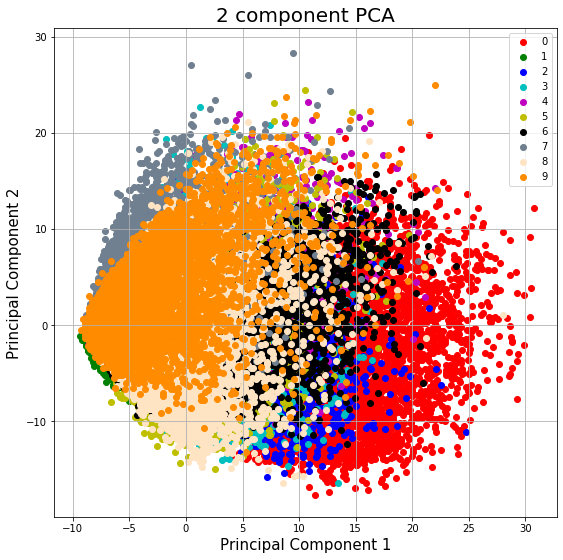

In [39]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0','1', '2','3','4','5','6','7','8','9']
colors = ['r','g','b','c','m','y','k','slategrey','bisque', 'darkorange']
for target, color in zip(targets,colors):
    indicesToKeep = new_df2['label'] == target
    ax.scatter(new_df2.loc[indicesToKeep, 'PC1']
               , new_df2.loc[indicesToKeep, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()

In [15]:
from scipy.linalg import eigh
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("“Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

ValueError: The eigenvalue range specified is not valid.
Valid range is [0,2]

In [10]:
import numpy as np
pca_data = np.vstack(train_img_scale, labels)
pca_data.shape

NameError: name 'labels' is not defined

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/kehyeong/miniconda3/envs/clustering/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
pca_df = pd.DataFrame(data=pca_data, columns=("principal component 1", "principal component 2", "label"))
pca_df

,principal component 1,principal component 2,label
0,-3.697628,9.668822,-1.907263
1,-1.077791,-0.877798,4.447410
2,11.166364,-2.850952,-4.055136
3,-7.181350,-1.179053,2.618862
4,5.400689,7.157158,7.633953
...,...,...,...
59995,-5.059209,5.082341,-5.883328
59996,-2.018872,-0.727794,1.058461
59997,-2.026976,2.713001,-4.316515
59998,-6.141900,-3.282973,4.725324


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [71]:
#train the model on the data
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=1000)

In [72]:
#predict the labels of new data (one observation)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [73]:
#predict the multiple observations at once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '3'], dtype=object)

score 는  mean accuracy를 의미함.

In [74]:
#measuring model performance
# 
logisticRegr.score(test_img, test_lbl)

0.9129